In [42]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy as sp
from scipy.sparse import csr_matrix

In [43]:
hf = h5py.File('clean_run_0102.h5', 'r')

In [44]:
events = hf['clean']

In [45]:
print(len(events))

69631


In [46]:
DETECTOR_LENGTH = 1000.0
DETECTOR_RADIUS = 275.0

x_disc = 20
y_disc = 20
z_disc = 20

x_inc = (2*DETECTOR_RADIUS)/x_disc
y_inc = (2*DETECTOR_RADIUS)/y_disc
z_inc = DETECTOR_LENGTH/z_disc

In [47]:
discElements = x_disc*y_disc*z_disc

#discretized_xyz = np.zeros([events['1'].shape[0],events['1'].shape[1]])
buckets = []
charges = []
downsampled = []
#num_pts = 0

#for i in range(len(events)):
for i in range(20):
    evt = str(i)
    num_pts = 0
    discretized_xyz = np.zeros([events[evt].shape[0],events[evt].shape[1]])
    for point in events[evt]:
        x_bucket = math.floor(((point[0]+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*x_disc)
        y_bucket = math.floor(((point[1]+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*y_disc)
        z_bucket = math.floor((point[2]/DETECTOR_LENGTH)*z_disc)

        bucket_num = z_bucket*x_disc*y_disc + x_bucket + y_bucket*x_disc
    
        #sparse matrix implementation
        buckets.append(bucket_num)
        charges.append(point[3]/10)
    
        avg_x = -DETECTOR_RADIUS + ((2*x_bucket+1)*x_inc)/2.0
        avg_y = -DETECTOR_RADIUS + ((2*y_bucket+1)*y_inc)/2.0
        avg_z = ((2*z_bucket+1)*z_inc)/2.0                          
    
        discretized_xyz[num_pts] = [avg_x, avg_y, avg_z, point[3], point[4], point[5], point[6]]
    
        num_pts += 1

    #create csr matrix where data is chrage and row np.zeros(len(col)) of size (1, discElements)
    cols = buckets
    rows = np.zeros(len(cols))
    data = charges

    #automatically sums data entries for data occuring at the same point
    #no need for sum_duplicates()
    discretized_data_sparse_CHARGE  = sp.sparse.csr_matrix((data, (rows, cols)), shape=(1, discElements))
    
    downsampled.append(discretized_xyz)

In [48]:
print(len(downsampled))

20


In [49]:
print(downsampled[0])

[[-4.12500000e+01 -1.37500000e+01  3.25000000e+02 ...  6.43700000e+03
   0.00000000e+00  4.40346977e+02]
 [ 1.37500000e+01 -1.23750000e+02  1.25000000e+02 ...  1.67100000e+03
   1.00000000e+00  4.35023414e+02]
 [ 1.37500000e+01 -6.87500000e+01  1.75000000e+02 ...  1.06500000e+03
   8.00000000e+00  2.09781302e+02]
 ...
 [ 6.87500000e+01 -9.62500000e+01  7.50000000e+01 ...  3.11800000e+03
   6.00000000e+00  8.89729493e+01]
 [ 6.87500000e+01 -9.62500000e+01  7.50000000e+01 ...  2.89400000e+03
   6.00000000e+00  1.00868966e+02]
 [ 6.87500000e+01 -9.62500000e+01  1.25000000e+02 ...  2.64300000e+03
   3.00000000e+00  4.15266102e+01]]


In [50]:
event = downsampled[0]

In [51]:
#scatter plot coloring by charge
import seaborn as sns
from matplotlib.colors import LogNorm

In [52]:
ch_colors = sns.cubehelix_palette(n_colors=6, start=0, rot=-0.4,
                                  gamma=1, hue=1, light=0.75, dark=0.1)
ch_cm = sns.blend_palette(ch_colors, as_cmap=True)

Text(0.5, 0.92, 'downsampled with charge')

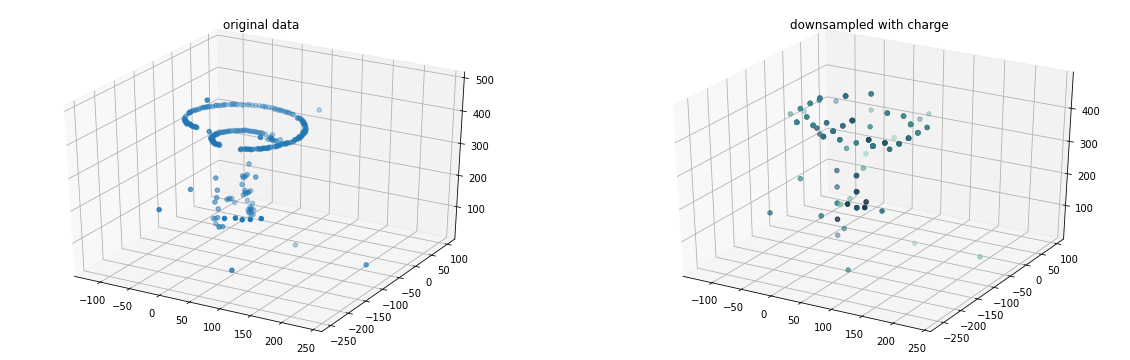

In [53]:
fig = plt.figure(figsize=(20, 14))

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(events['1'][:,0], events['1'][:,1], events['1'][:,2])
#ax.axis('equal')
ax.set_title("original data")

#######################################################################################################################
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(downsampled[1][:,0], downsampled[1][:,1], downsampled[1][:,2], cmap=ch_cm, norm=LogNorm(), c=downsampled[1][:,3])
#ax.axis('equal')
ax.set_title('downsampled with charge')

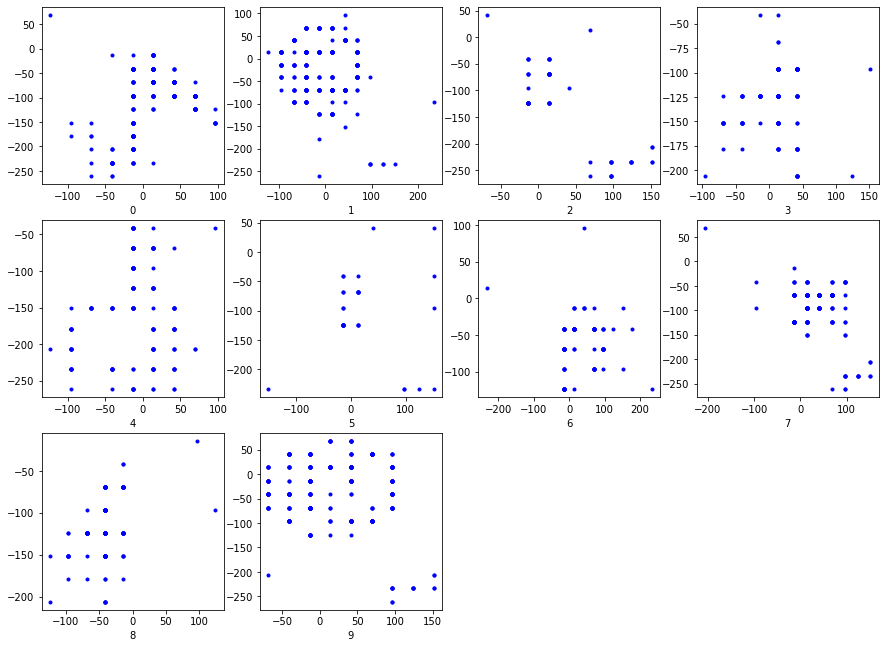

In [54]:
#xy plot
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.xticks()
    plt.yticks()
    plt.grid(False)
    plt.plot(downsampled[i][:,0],downsampled[i][:,1], 'b.')
    plt.xlabel(i)
plt.show()

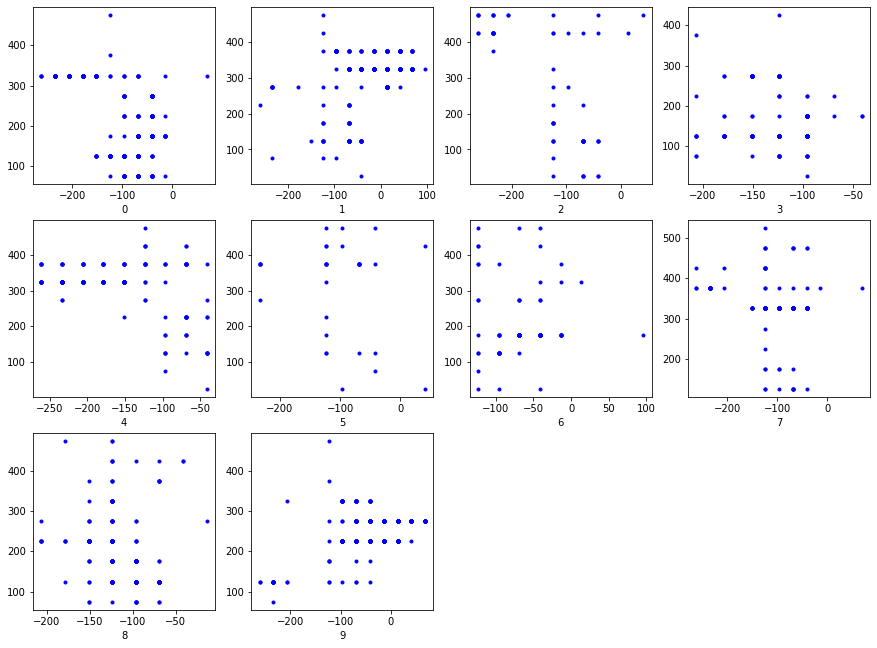

In [55]:
#yz plot
plt.figure(figsize=(15,15))
for i in range(10):
    x = str(i)
    plt.subplot(4,4,i+1)
    plt.xticks()
    plt.yticks()
    plt.grid(False)
    plt.plot(downsampled[i][:,1],downsampled[i][:,2], 'b.')
    plt.xlabel(i)
plt.show()

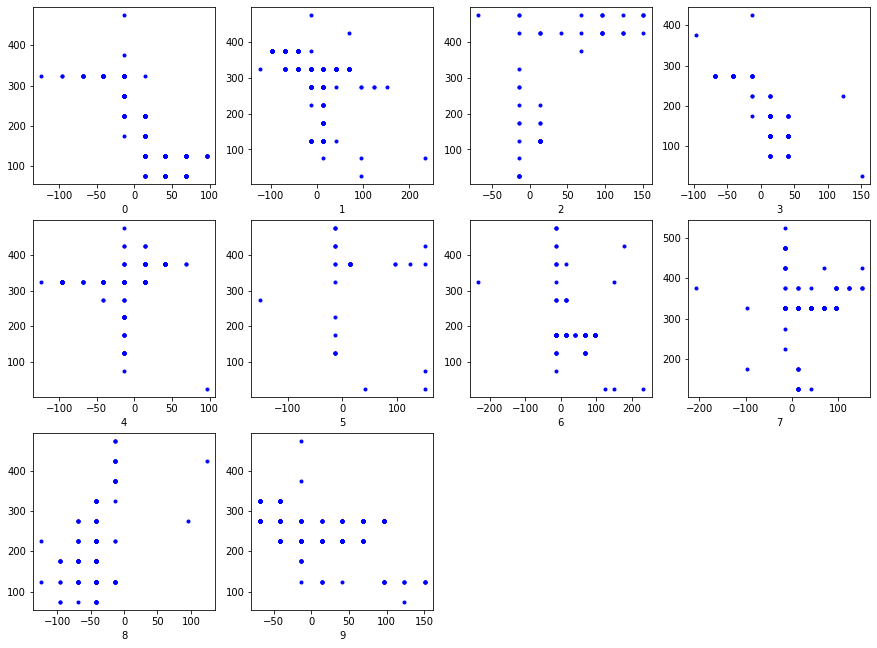

In [56]:
#xz plot
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.xticks()
    plt.yticks()
    plt.grid(False)
    plt.plot(downsampled[i][:,0],downsampled[i][:,2], 'b.')
    plt.xlabel(i)
plt.show()

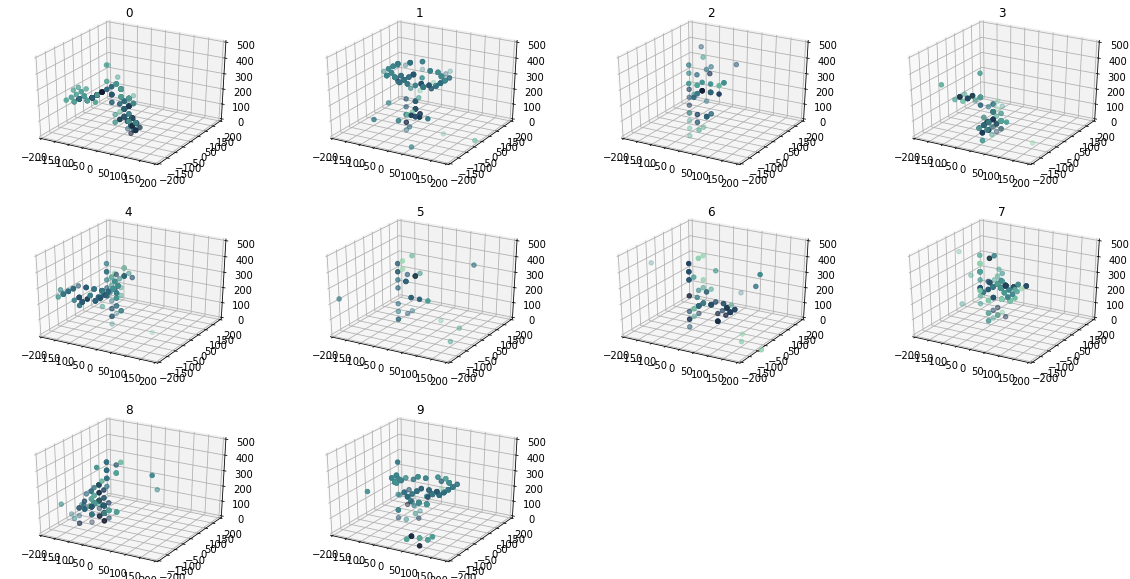

In [57]:
#plot 3d
fig = plt.figure(figsize=(20, 14))
for i in range(10):
    ax = fig.add_subplot(4, 4, i+1, projection='3d')
    ax.set_xlim3d(left=-200.0, right=200.0) 
    ax.set_ylim3d(bottom=-200.0, top=200.0) 
    ax.set_zlim3d(bottom=0.0, top=500.0)
    ax.scatter(downsampled[i][:,0], downsampled[i][:,1], downsampled[i][:,2], cmap=ch_cm, norm=LogNorm(), c=downsampled[i][:,3])
    ax.set_title(i) 
plt.show()